In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
# Load the data
df_1= pd.read_csv('data1.csv')
df_2= pd.read_csv('data2.csv')
predcit_df = pd.read_csv('predicion.csv')

df_1.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [3]:
df_2.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,50785,0.0,2013-02-04,Dmdd,1996,DMDD,35.290799,-4.059696,Dinamu Secondary School,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,other,other
1,51630,0.0,2013-02-04,Government Of Tanzania,1569,DWE,36.656709,-3.309214,Kimnyak,0,...,never pay,soft,good,insufficient,insufficient,spring,spring,groundwater,communal standpipe,communal standpipe
2,17168,0.0,2013-02-01,NaN,1567,NaN,34.767863,-5.004344,Puma Secondary,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,other,other
3,45559,0.0,2013-01-22,Finn Water,267,FINN WATER,38.058046,-9.418672,Kwa Mzee Pange,0,...,unknown,soft,good,dry,dry,shallow well,shallow well,groundwater,other,other
4,49871,500.0,2013-03-27,Bruder,1260,BRUDER,35.006123,-10.950412,Kwa Mzee Turuka,0,...,monthly,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe


In [4]:
# unir los dos dataframes
df = pd.concat([df_1, df_2], axis=0)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74250 entries, 0 to 14849
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     74250 non-null  int64  
 1   amount_tsh             74250 non-null  float64
 2   date_recorded          74250 non-null  object 
 3   funder                 69743 non-null  object 
 4   gps_height             74250 non-null  int64  
 5   installer              69718 non-null  object 
 6   longitude              74250 non-null  float64
 7   latitude               74250 non-null  float64
 8   wpt_name               74248 non-null  object 
 9   num_private            74250 non-null  int64  
 10  basin                  74250 non-null  object 
 11  subvillage             73780 non-null  object 
 12  region                 74250 non-null  object 
 13  region_code            74250 non-null  int64  
 14  district_code          74250 non-null  int64  
 15  lga    

### Faltan datos en las columnas
#### funder,installer,wpt_name,subvillage,public_meeting,scheme_management,scheme_management,permit,

In [5]:
df.describe()

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,construction_year
count,74250.000000,74250.000000,74250.000000,74250.000000,7.425000e+04,74250.000000,74250.000000,74250.000000,74250.000000,74250.000000
mean,37124.500000,318.685704,665.667313,34.074262,-5.701771e+00,0.462330,15.265414,5.629077,180.750828,1298.463650
std,21434.273081,2906.762364,692.761033,6.572519,2.944969e+00,11.537879,17.508907,9.641636,471.086120,952.349375
min,0.000000,0.000000,-90.000000,0.000000,-1.164944e+01,0.000000,1.000000,0.000000,0.000000,0.000000
25%,18562.250000,0.000000,0.000000,33.086819,-8.525675e+00,0.000000,5.000000,2.000000,0.000000,0.000000
50%,37124.500000,0.000000,364.000000,34.907475,-5.026540e+00,0.000000,12.000000,3.000000,25.000000,1986.000000
75%,55686.750000,20.000000,1317.000000,37.181685,-3.325058e+00,0.000000,17.000000,5.000000,215.000000,2004.000000
max,74249.000000,350000.000000,2777.000000,40.345193,-2.000000e-08,1776.000000,99.000000,80.000000,30500.000000,2013.000000


In [6]:
# ver que varables son categoricas y cuales numericas
print(f'Variables Categoricas{df.select_dtypes(include=['object']).columns}')
print(f'Varibales numericas{df.select_dtypes(include=['float64',
                          'int64']).columns}')

Variables CategoricasIndex(['date_recorded', 'funder', 'installer', 'wpt_name', 'basin',
       'subvillage', 'region', 'lga', 'ward', 'public_meeting', 'recorded_by',
       'scheme_management', 'scheme_name', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')
Varibales numericasIndex(['id', 'amount_tsh', 'gps_height', 'longitude', 'latitude',
       'num_private', 'region_code', 'district_code', 'population',
       'construction_year'],
      dtype='object')


In [7]:
#comprobar valores unicos en todas las columnas
for col in df.columns:
    print(f'{col}: {df[col].unique()}')

id: [69572  8776 34310 ... 28749 33492 68707]
amount_tsh: [6.00e+03 0.00e+00 2.50e+01 2.00e+01 2.00e+02 5.00e+02 5.00e+01 4.00e+03
 1.50e+03 6.00e+00 2.50e+02 1.00e+01 1.00e+03 1.00e+02 3.00e+01 2.00e+03
 4.00e+02 1.20e+03 4.00e+01 3.00e+02 2.50e+04 7.50e+02 5.00e+03 6.00e+02
 7.20e+03 2.40e+03 5.00e+00 3.60e+03 4.50e+02 4.00e+04 1.20e+04 3.00e+03
 7.00e+00 2.00e+04 2.80e+03 2.20e+03 7.00e+01 5.50e+03 1.00e+04 2.50e+03
 6.50e+03 5.50e+02 3.30e+01 8.00e+03 4.70e+03 7.00e+03 1.40e+04 1.30e+03
 1.00e+05 7.00e+02 1.00e+00 6.00e+01 3.50e+02 2.00e-01 3.50e+01 3.06e+02
 8.50e+03 1.17e+05 3.50e+03 5.20e+02 1.50e+01 6.30e+03 9.00e+03 1.50e+02
 1.20e+05 1.38e+05 3.50e+05 4.50e+03 1.30e+04 4.50e+04 2.00e+00 1.50e+04
 1.10e+04 5.00e+04 7.50e+03 1.63e+04 8.00e+02 1.60e+04 3.00e+04 5.30e+01
 5.40e+03 7.00e+04 2.50e+05 2.00e+05 2.60e+04 1.80e+04 2.60e+01 5.90e+02
 9.00e+02 9.00e+00 1.40e+03 1.70e+05 2.20e+02 3.80e+04 2.50e-01 1.20e+01
 6.00e+04 5.90e+01 3.50e+04 3.00e+00 2.55e+03 5.00e-01]
date_recor

### revisando los valores unicos de todas las variables se pueden hacer transformaciones en las variables:

#### waterpoint_type_group,waterpoint_type_group,source_class,source_type,source,quantity_group


In [8]:
# revisar valores nulos
df.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    4507
gps_height                   0
installer                 4532
longitude                    0
latitude                     0
wpt_name                     2
num_private                  0
basin                        0
subvillage                 470
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            4155
recorded_by                  0
scheme_management         4847
scheme_name              36052
permit                    3793
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

#### Se hace la primera transformacion para calcualr la antiguedad del punto de agua y ver si es nuevo, viejo,antiguo o media y asi saber con mas presicion si por ejemplo llos puntos de agua contruidos en ciertos años tienen mas fallas

In [9]:
# Convertir a datetime
df["date_recorded"] = pd.to_datetime(df["date_recorded"])
df["year_recorded"] = df["date_recorded"].dt.year
df["month_recorded"] = df["date_recorded"].dt.month
df["day_recorded"] = df["date_recorded"].dt.day

In [10]:
print(df["construction_year"].unique())

[1999 2010 2009 1986    0 2011 1987 1991 1978 1992 2008 1974 2000 2002
 2004 1972 2003 1980 2007 1973 1985 1970 1995 2006 1962 2005 1997 2012
 1996 1977 1983 1984 1990 1982 1976 1988 1989 1975 1960 1961 1998 1963
 1971 1994 1968 1993 2001 1979 1967 2013 1969 1981 1964 1966 1965]


In [11]:
df["waterpoint_age"] = df["year_recorded"] - df["construction_year"]
df.loc[df["construction_year"] == 0, "waterpoint_age"] = df["waterpoint_age"].median()

print(df["waterpoint_age"])
# Convertir a categorico
print(df["waterpoint_age"].describe())

0        12
1         3
2         4
3        27
4        26
         ..
14845    23
14846    17
14847     3
14848     4
14849     5
Name: waterpoint_age, Length: 74250, dtype: int64
count    74250.000000
mean        19.039488
std         11.272755
min         -7.000000
25%          8.000000
50%         26.000000
75%         26.000000
max         53.000000
Name: waterpoint_age, dtype: float64


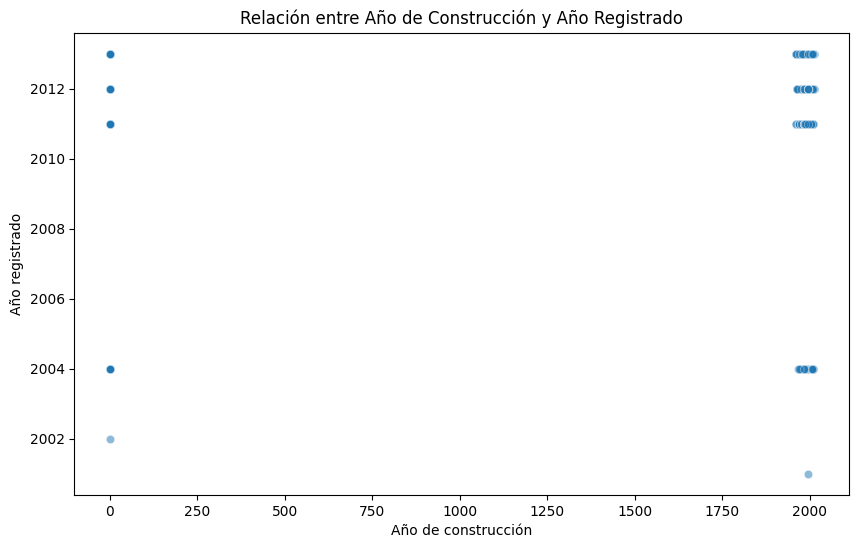

In [12]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="construction_year", y="year_recorded", alpha=0.5)
plt.xlabel("Año de construcción")
plt.ylabel("Año registrado")
plt.title("Relación entre Año de Construcción y Año Registrado")
plt.show()

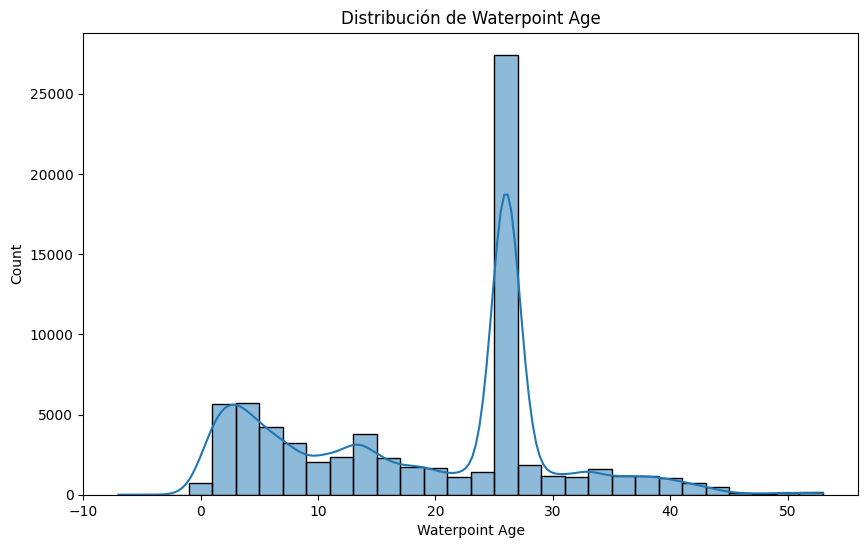

In [13]:
plt.figure(figsize=(10, 6))
sns.histplot(df['waterpoint_age'], bins=30, kde=True)
plt.xlabel("Waterpoint Age")
plt.title("Distribución de Waterpoint Age")
plt.show()

In [14]:
# Filtrar los registros con waterpoint_age negativo
registros_negativos = df.loc[df["waterpoint_age"] < 0]

# Mostrar las columnas 'id', 'year_recorded' y 'construction_year'
print(registros_negativos[['id', 'year_recorded', 'construction_year']])

          id  year_recorded  construction_year
8729   20198           2004               2008
10441  55069           2004               2006
13366  48759           2004               2011
23373  20534           2004               2009
27501  53086           2004               2009
32619   9195           2004               2005
33942   5971           2004               2007
39559  15921           2004               2009
48555   1251           2004               2008
2922    5197           2004               2008
7050   11375           2004               2011
7718    1084           2004               2006


### Aqui con esta edad del punto de agua puedo categorizarla segun la edad y ver cuales fallan mas

In [15]:
# Definir los bins y las etiquetas
bins = [-np.inf, 0, 8, 26, 53]
labels = ['Negativo/Inconsistente', 'Muy Baja', 'Baja', 'Alta']

# Supongamos que df es tu DataFrame y 'waterpoint_age' es la variable a categorizar
df['waterpoint_age_category'] = pd.cut(df['waterpoint_age'], bins=bins, labels=labels, include_lowest=True)

# Ver la distribución de las categorías
print(df['waterpoint_age_category'].value_counts())

waterpoint_age_category
Baja                      43881
Muy Baja                  18811
Alta                      10817
Negativo/Inconsistente      741
Name: count, dtype: int64


In [16]:
df.head()

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,waterpoint_age,waterpoint_age_category
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,spring,spring,groundwater,communal standpipe,communal standpipe,2011,3,14,12,Baja
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013,3,6,3,Muy Baja
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,dam,dam,surface,communal standpipe multiple,communal standpipe,2013,2,25,4,Muy Baja
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe,2013,1,28,27,Alta
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2011,7,13,26,Baja


### La segunda transformacion que podemos realizar en agrupar puntos de agua por proximidad esto nos va a permitir saber si los puntos de agua mas alejados del centro tienen mas o menos problemas

In [17]:
print(df[["longitude", "latitude", "gps_height"]].isnull().sum())

longitude     0
latitude      0
gps_height    0
dtype: int64


In [18]:
from sklearn.cluster import KMeans

# Aplicar K-Means con 10 clusters (ajustable)
kmeans = KMeans(n_clusters=10, random_state=42, n_init=10)
df["location_cluster"] = kmeans.fit_predict(df[["longitude", "latitude"]])

In [19]:
from geopy.distance import geodesic

# Crear un diccionario con el centro de cada región
region_centers = df.groupby("region")[["latitude", "longitude"]].median()

# Función para calcular la distancia geográfica
def calcular_distancia(row):
    centro = region_centers.loc[row["region"]]
    return geodesic((row["latitude"], row["longitude"]), (centro["latitude"], centro["longitude"])).km


# Aplicar la función
df["distance_to_region_center"] = df.apply(calcular_distancia, axis=1)
print(df["distance_to_region_center"].describe())

count    74250.000000
mean       179.716903
std        624.953655
min          0.145322
25%         32.164197
50%         59.936157
75%        102.146851
max       3694.772886
Name: distance_to_region_center, dtype: float64


### Con esta distancia puedo categorizar la lejania en cercano(1), mediano(2), lejano(3)

In [20]:
#### Con esta distancia puedo categorizar la lejania en cercano(1), mediano(2), lejano(3)
df['log_distance'] = np.log1p(df['distance_to_region_center'])
df['log_distance_categoria'] = pd.qcut(df['log_distance'], q=4, 
                                        labels=['Muy corta', 'Corta', 'Media', 'Larga'])

log_distance_categoria
Muy corta    18563
Larga        18563
Corta        18562
Media        18562
Name: count, dtype: int64


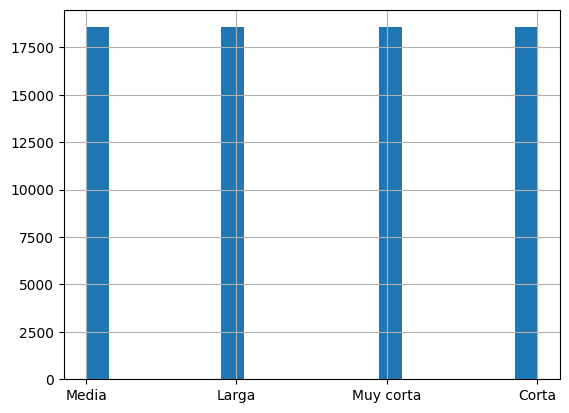

In [21]:
print(df['log_distance_categoria'].value_counts())
df['log_distance_categoria'].hist(bins=20)
plt.show()

In [22]:
df

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,waterpoint_type_group,year_recorded,month_recorded,day_recorded,waterpoint_age,waterpoint_age_category,location_cluster,distance_to_region_center,log_distance,log_distance_categoria
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,communal standpipe,2011,3,14,12,Baja,4,87.378976,4.481634,Media
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,communal standpipe,2013,3,6,3,Muy Baja,9,73.379187,4.309176,Media
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,communal standpipe,2013,2,25,4,Muy Baja,6,206.064304,5.333029,Larga
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,communal standpipe,2013,1,28,27,Alta,0,108.075822,4.692043,Larga
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,communal standpipe,2011,7,13,26,Baja,2,26.536861,3.315526,Muy corta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14845,39307,0.0,2011-02-24,Danida,34,Da,38.852669,-6.582841,Kwambwezi,0,...,communal standpipe,2011,2,24,23,Baja,3,38.931083,3.687155,Corta
14846,18990,1000.0,2011-03-21,Hiap,0,HIAP,37.451633,-5.350428,Bonde La Mkondoa,0,...,hand pump,2011,3,21,17,Baja,3,120.857430,4.802852,Larga
14847,28749,0.0,2013-03-04,NaN,1476,NaN,34.739804,-4.585587,Bwawani,0,...,communal standpipe,2013,3,4,3,Muy Baja,7,21.237615,3.101785,Muy corta
14848,33492,0.0,2013-02-18,Germany,998,DWE,35.432732,-10.584159,Kwa John,0,...,communal standpipe,2013,2,18,4,Muy Baja,4,26.011852,3.296276,Muy corta


#### La altura (gps_height) puede ser una variable importante si hay patrones de falla en áreas más altas o bajas.

In [23]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df["gps_height_scaled"] = scaler.fit_transform(df[["gps_height"]])

### Tercera transformacion, convertimos las variables categoricas en numericas

In [25]:
threshold = 10  # Número mínimo de ocurrencias
# Seleccionar columnas categóricas
cat_cols = df.select_dtypes(include=['object']).columns
for col in cat_cols:
    counts = df[col].value_counts()
    mask = df[col].isin(counts[counts < threshold].index)
    df[col] = np.where(mask, 'Otros', df[col])

import category_encoders as ce

# Aplicar Binary Encoding
encoder = ce.BinaryEncoder(cols=cat_cols)
df_encoded = encoder.fit_transform(df)



pd.options.display.max_columns = None
print(df.head())  

      id  amount_tsh date_recorded   funder  gps_height     installer  \
0  69572      6000.0    2011-03-14    Roman        1390         Roman   
1   8776         0.0    2013-03-06  Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25    Otros         686  World vision   
3  67743         0.0    2013-01-28   Unicef         263        UNICEF   
4  19728         0.0    2011-07-13    Otros           0       Artisan   

   longitude   latitude  wpt_name  num_private                    basin  \
0  34.938093  -9.856322      none            0               Lake Nyasa   
1  34.698766  -2.147466  Zahanati            0            Lake Victoria   
2  37.460664  -3.821329     Otros            0                  Pangani   
3  38.486161 -11.155298     Otros            0  Ruvuma / Southern Coast   
4  31.130847  -1.825359   Shuleni            0            Lake Victoria   

   subvillage   region  region_code  district_code        lga        ward  \
0       Otros   Iringa           

In [26]:
# Rellenar valores nulos con la moda de cada columna
categorical_columns = ["funder", "installer", "scheme_name", "scheme_management",
                       "management", "payment", "water_quality", "quantity", "source", "waterpoint_type"]

for col in categorical_columns:
    df[col].fillna(df[col].mode()[0], inplace=True)
    

/var/folders/tt/9w1m_shj201ghz1t_npltd1m0000gn/T/ipykernel_7940/1101052612.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)


In [27]:
# Función para agrupar categorías poco frecuentes
def reducir_categorias(df, col, threshold=0.01):
    """Agrupa en 'Otros' las categorías que representan menos del threshold (%) de los datos"""
    counts = df[col].value_counts(normalize=True)
    rare_categories = counts[counts < threshold].index
    df[col] = df[col].replace(rare_categories, "Otros")
    return df


# Aplicar a las variables con muchas categorías
#for col in ["funder", "installer", "scheme_name"]:
    #df = reducir_categorias(df, col)

In [ ]:
#df = pd.get_dummies(df, columns=["water_quality", "quantity", "source", "waterpoint_type"], drop_first=True)

In [28]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

# Codificar las columnas categóricas
for column in categorical_columns:
    df[column] = label_encoder.fit_transform(df[column].astype(str))



In [ ]:
# Contar las categorías únicas por columna categórica
category_counts = df[categorical_columns].nunique()

# Imprimir las columnas con más de 20 categorías
columns_to_drop = category_counts[category_counts > 20].index

print(f"Eliminando las siguientes columnas con más de 20 categorías: {columns_to_drop}")
df = df.drop(columns=columns_to_drop)


Eliminando las siguientes columnas con más de 20 categorías: Index(['funder', 'installer', 'scheme_name'], dtype='object')


### Cuarta Trasformacion Manejo de outlayers

In [30]:
# Seleccionar columnas numéricas
numerical_columns = df.select_dtypes(include=["int64", "float64"]).columns

# Función para identificar outliers
def detectar_outliers(df, column):
    Q1 = df[column].quantile(0.25)  # Percentil 25
    Q3 = df[column].quantile(0.75)  # Percentil 75
    IQR = Q3 - Q1  # Rango intercuartil
    lower_bound = Q1 - 1.5 * IQR  # Límite inferior
    upper_bound = Q3 + 1.5 * IQR  # Límite superior
    return df[(df[column] < lower_bound) | (df[column] > upper_bound)]


# Detectar outliers en todas las columnas numéricas
outliers_dict = {col: detectar_outliers(df, col) for col in numerical_columns}


# Contar cuántos outliers hay por variable
outliers_count = {col: len(outliers_dict[col]) for col in numerical_columns}
print("Cantidad de outliers por variable:", outliers_count)

Cantidad de outliers por variable: {'id': 0, 'amount_tsh': 13971, 'gps_height': 0, 'longitude': 2269, 'latitude': 0, 'num_private': 951, 'region_code': 4480, 'district_code': 5237, 'population': 5502, 'scheme_management': 23486, 'construction_year': 0, 'management': 23626, 'payment': 0, 'water_quality': 10745, 'quantity': 975, 'source': 840, 'waterpoint_type': 0, 'waterpoint_age': 0, 'distance_to_region_center': 3356, 'log_distance': 3550, 'gps_height_scaled': 0}


In [31]:
df_target = pd.read_csv('objetivo.csv')

df_final = pd.merge(df, df_target, on="id")
df_final

,id,amount_tsh,date_recorded,gps_height,longitude,latitude,wpt_name,num_private,basin,subvillage,region,region_code,district_code,lga,ward,population,public_meeting,recorded_by,scheme_management,permit,construction_year,extraction_type,extraction_type_group,extraction_type_class,management,management_group,payment,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded,month_recorded,day_recorded,waterpoint_age,waterpoint_age_category,location_cluster,distance_to_region_center,log_distance,log_distance_categoria,gps_height_scaled,status_group
0,69572,6000.0,2011-03-14,1390,34.938093,-9.856322,none,0,Lake Nyasa,Otros,Iringa,11,5,Ludewa,Mundindi,109,True,GeoData Consultants Ltd,6,False,1999,gravity,gravity,gravity,7,user-group,2,annually,6,good,1,enough,8,spring,groundwater,2,communal standpipe,2011,3,14,12,Baja,4,87.378976,4.481634,Media,0.516219,functional
1,8776,0.0,2013-03-06,1399,34.698766,-2.147466,Zahanati,0,Lake Victoria,Otros,Mara,20,2,Serengeti,Natta,280,NaN,GeoData Consultants Ltd,1,True,2010,gravity,gravity,gravity,11,user-group,0,never pay,6,good,2,insufficient,5,rainwater harvesting,surface,2,communal standpipe,2013,3,6,3,Muy Baja,9,73.379187,4.309176,Media,0.519358,functional
2,34310,25.0,2013-02-25,686,37.460664,-3.821329,Otros,0,Pangani,Majengo,Manyara,21,4,Simanjiro,Ngorika,250,True,GeoData Consultants Ltd,6,True,2009,gravity,gravity,gravity,7,user-group,4,per bucket,6,good,1,enough,0,dam,surface,3,communal standpipe,2013,2,25,4,Muy Baja,6,206.064304,5.333029,Larga,0.270666,functional
3,67743,0.0,2013-01-28,263,38.486161,-11.155298,Otros,0,Ruvuma / Southern Coast,Mahakamani,Mtwara,90,63,Nanyumbu,Nanyumbu,58,True,GeoData Consultants Ltd,6,True,1986,submersible,submersible,submersible,7,user-group,0,never pay,6,good,0,dry,3,borehole,groundwater,3,communal standpipe,2013,1,28,27,Alta,0,108.075822,4.692043,Larga,0.123125,non functional
4,19728,0.0,2011-07-13,0,31.130847,-1.825359,Shuleni,0,Lake Victoria,Otros,Kagera,18,1,Karagwe,Nyakasimbi,0,True,GeoData Consultants Ltd,6,True,0,gravity,gravity,gravity,1,other,0,never pay,6,good,3,seasonal,5,rainwater harvesting,surface,2,communal standpipe,2011,7,13,26,Baja,2,26.536861,3.315526,Muy corta,0.031392,functional
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59395,60739,10.0,2013-05-03,1210,37.169807,-3.253847,Otros,0,Pangani,Otros,Kilimanjaro,3,5,Hai,Masama Magharibi,125,True,GeoData Consultants Ltd,9,True,1999,gravity,gravity,gravity,9,user-group,4,per bucket,6,good,1,enough,8,spring,groundwater,2,communal standpipe,2013,5,3,14,Baja,6,39.864443,3.710260,Corta,0.453436,functional
59396,27263,4700.0,2011-05-07,1212,35.249991,-9.070629,Otros,0,Rufiji,Igumbilo,Iringa,11,4,Njombe,Ikondo,56,True,GeoData Consultants Ltd,6,True,1996,gravity,gravity,gravity,7,user-group,2,annually,6,good,1,enough,6,river/lake,surface,2,communal standpipe,2011,5,7,15,Baja,4,52.187588,3.973825,Corta,0.454133,functional
59397,37057,0.0,2011-04-11,0,34.017087,-8.750434,Mashine,0,Rufiji,Otros,Mbeya,12,7,Mbarali,Chimala,0,True,GeoData Consultants Ltd,6,False,0,swn 80,swn 80,handpump,7,user-group,3,monthly,1,fluoride,1,enough,3,borehole,groundwater,4,hand pump,2011,4,11,26,Baja,8,60.056744,4.111804,Media,0.031392,functional
59398,31282,0.0,2011-03-08,0,35.861315,-6.378573,Otros,0,Rufiji,Mwinyi,Dodoma,1,4,Chamwino,Mvumi Makulu,0,True,GeoData Consultants Ltd,6,True,0,nira/tanira,nira/tanira,handpump,7,user-group,0,never pay,6,good,2,insufficient,7,shallow well,groundwater,4,hand pump,2011,3,8,26,Baja,7,31.897328,3.493391,Muy corta,0.031392,functional


In [ ]:
#ver las variables q no sean numericas
print(f'Variables Categoricas{df_final.select_dtypes(include=["object"]).columns}')

Variables CategoricasIndex(['wpt_name', 'basin', 'subvillage', 'region', 'lga', 'ward',
       'public_meeting', 'recorded_by', 'permit', 'extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management_group',
       'payment_type', 'quality_group', 'quantity_group', 'source_type',
       'source_class', 'waterpoint_type_group', 'status_group'],
      dtype='object')


In [ ]:
df_final = df_final.drop(columns=['recorded_by','date_recorded','subvillage'])
predcit_df = predcit_df.drop(columns=['recorded_by','date_recorded','subvillage'])


In [ ]:
# Codificar la variable objetivo 'status_group'
le = LabelEncoder()
df_final['status_group'] = le.fit_transform(df_final['status_group'])

# Realizar One-Hot Encoding para las variables con muchas categorías
df_final = pd.get_dummies(df_final, columns=['wpt_name', 'basin','region', 'lga', 'ward', 
                                              'extraction_type', 'extraction_type_group', 'extraction_type_class', 
                                              'management_group', 'payment_type', 'quality_group', 'quantity_group', 
                                              'source_type', 'source_class', 'waterpoint_type_group'], drop_first=True)

+

# Realizar Label Encoding para las variables binarias
le = LabelEncoder()
df_final['public_meeting'] = le.fit_transform(df_final['public_meeting'])
df_final['permit'] = le.fit_transform(df_final['permit'])

predcit_df['public_meeting'] = le.fit_transform(predcit_df['public_meeting'])
predcit_df['permit'] = le.fit_transform(predcit_df['permit'])

In [ ]:
predcit_df

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,management,payment,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,day_recorded,waterpoint_age,location_cluster,distance_to_region_center,gps_height_scaled,wpt_name_Barabarani,wpt_name_Bombani,wpt_name_Bondeni,wpt_name_Bwawani,wpt_name_Ccm,wpt_name_Center,wpt_name_Dispensary,wpt_name_Kanisani,wpt_name_Kijiweni,wpt_name_Kilabuni,wpt_name_Kisimani,wpt_name_Kituo Cha Afya,wpt_name_Madukani,wpt_name_Maendeleo,wpt_name_Mahakamani,wpt_name_Majengo,wpt_name_Mashineni,wpt_name_Mbugani,wpt_name_Miembeni,wpt_name_Mkombozi,wpt_name_Mkuyuni,wpt_name_Mkwajuni,wpt_name_Mlimani,wpt_name_Msikitini,wpt_name_Mtakuja,wpt_name_Muungano,wpt_name_Mwembeni,wpt_name_Ofisi Ya Kijiji,wpt_name_Ofisini,wpt_name_Otros,wpt_name_Rc Church,wpt_name_School,wpt_name_Secondary,wpt_name_Sekondari,wpt_name_Shule,wpt_name_Shule Ya Msingi,wpt_name_Shuleni,wpt_name_Shuleni Sekondari,wpt_name_Sokoni,wpt_name_Songambele,wpt_name_Tenkini,wpt_name_Tumaini,wpt_name_Umoja,wpt_name_Upendo,wpt_name_Uwanjani,wpt_name_Zahanati,wpt_name_none,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nzega,lga_Otros,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,ward_Berega,ward_Biharamulo Urban,ward_Bitale,ward_Boma la ng'ombe,ward_Buchambi,ward_Bugarama,ward_Bugoro,ward_Buhendangabo,ward_Bujashi,ward_Bujonde,ward_Bumera,ward_Bunamhala,ward_Bungu,ward_Bunyambo,ward_Busagara,ward_Busawe,ward_Busilili,ward_Busole,ward_Buterankuzi,ward_Bwakila Chini,ward_Bwambo,ward_Chakwale,ward_Chala,ward_Chalinze,ward_Chambo,ward_Chamkoroma,ward_Chanika,ward_Chanzuru,ward_Chela,ward_Chigungu,ward_Chimala,ward_Chinamili,ward_Chitete,ward_Chiugutwa,ward_Choma,ward_Chumo,ward_Dareda,ward_Didia,ward_Diongoya,ward_Doma,ward_Dongobesh,ward_Dumila,ward_Dutwa,ward_Endabash,ward_Endasak,ward_Engarenaibor,ward_Gwanumpu,ward_Haidom,ward_Halungu,ward_Hedaru,ward_Hembeti,ward_Hombolo,ward_Hungumalwa,ward_Ibadakuli,ward_Idodi,ward_Ifakara,ward_Ifunda,ward_Igalukilo,ward_Igamba,ward_Igongolo,wa

In [ ]:
# Separar las variables independientes (X) y la variable dependiente (y)
X = df_final.drop(columns=["status_group"])  # Reemplaza "target_column" con el nombre de tu columna objetivo
y = df_final["status_group"]  # Variable objetivo

# Dividir en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Crear el modelo Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrenar el modelo
rf.fit(X_train, y_train)

# Realizar predicciones
y_pred_rf = rf.predict(X_test)

# Evaluar el modelo
print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.8003928170594837
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.88      0.84      9724
           1       0.50      0.34      0.40      1293
           2       0.83      0.78      0.80      6803

    accuracy                           0.80     17820
   macro avg       0.71      0.66      0.68     17820
weighted avg       0.79      0.80      0.79     17820



In [ ]:
df_final


id  amount_tsh  gps_height  longitude   latitude  num_private  \
0      69572      6000.0        1390  34.938093  -9.856322            0   
1       8776         0.0        1399  34.698766  -2.147466            0   
2      34310        25.0         686  37.460664  -3.821329            0   
3      67743         0.0         263  38.486161 -11.155298            0   
4      19728         0.0           0  31.130847  -1.825359            0   
...      ...         ...         ...        ...        ...          ...   
59395  60739        10.0        1210  37.169807  -3.253847            0   
59396  27263      4700.0        1212  35.249991  -9.070629            0   
59397  37057         0.0           0  34.017087  -8.750434            0   
59398  31282         0.0           0  35.861315  -6.378573            0   
59399  26348         0.0         191  38.104048  -6.747464            0   

       region_code  district_code  population  public_meeting  \
0               11              5         109               1   
1               20              2         280               2   
2               21              4         250               1   
3               90             63          58               1   
4               18              1           0               1   
...            ...            ...         ...             ...   
59395            3              5         125               1   
59396           11              4          56               1   
59397           12              7           0               1   
59398            1              4           0               1   
59399            5              2         150               1   

       scheme_management  permit  construction_year  management  payment  \
0                      6       0               1999           7        2   
1                      1       1               2010          11        0   
2                      6       1               2009           7        4   
3                      6       1               1986           7        0   
4                      6       1                  0           1        0   
...                  ...     ...                ...         ...      ...   
59395                  9       1               1999           9        4   
59396                  6       1               1996           7        2   
59397                  6       0                  0           7        3   
59398                  6       1                  0           7        0   
59399                  6       1               2002           7        5   

       water_quality  quantity  source  waterpoint_type  year_recorded  \
0                  6         1       8                2           2011   
1                  6         2       5                2           2013   
2                  6         1       0                3           2013   
3                  6         0       3                3           2013   
4                  6         3       5                2           2011   
...              ...       ...     ...              ...            ...   
59395              6         1       8                2           2013   
59396              6         1       6                2           2011   
59397              1         1       3                4           2011   
59398              6         2       7                4           2011   
59399              4         1       7                4           2011   

       month_recorded  day_recorded  waterpoint_age  location_cluster  \
0                   3            14              12                 4   
1                   3             6               3                 9   
2                   2            25               4                 6   
3                   1            28              27                 0   
4                   7            13              26                 2   
...               ...           ...             ...               ...   
59395          

In [ ]:
predcit_df

,id,amount_tsh,gps_height,longitude,latitude,num_private,region_code,district_code,population,public_meeting,scheme_management,permit,construction_year,management,payment,water_quality,quantity,source,waterpoint_type,year_recorded,month_recorded,day_recorded,waterpoint_age,location_cluster,distance_to_region_center,gps_height_scaled,wpt_name_Barabarani,wpt_name_Bombani,wpt_name_Bondeni,wpt_name_Bwawani,wpt_name_Ccm,wpt_name_Center,wpt_name_Dispensary,wpt_name_Kanisani,wpt_name_Kijiweni,wpt_name_Kilabuni,wpt_name_Kisimani,wpt_name_Kituo Cha Afya,wpt_name_Madukani,wpt_name_Maendeleo,wpt_name_Mahakamani,wpt_name_Majengo,wpt_name_Mashineni,wpt_name_Mbugani,wpt_name_Miembeni,wpt_name_Mkombozi,wpt_name_Mkuyuni,wpt_name_Mkwajuni,wpt_name_Mlimani,wpt_name_Msikitini,wpt_name_Mtakuja,wpt_name_Muungano,wpt_name_Mwembeni,wpt_name_Ofisi Ya Kijiji,wpt_name_Ofisini,wpt_name_Otros,wpt_name_Rc Church,wpt_name_School,wpt_name_Secondary,wpt_name_Sekondari,wpt_name_Shule,wpt_name_Shule Ya Msingi,wpt_name_Shuleni,wpt_name_Shuleni Sekondari,wpt_name_Sokoni,wpt_name_Songambele,wpt_name_Tenkini,wpt_name_Tumaini,wpt_name_Umoja,wpt_name_Upendo,wpt_name_Uwanjani,wpt_name_Zahanati,wpt_name_none,basin_Lake Nyasa,basin_Lake Rukwa,basin_Lake Tanganyika,basin_Lake Victoria,basin_Pangani,basin_Rufiji,basin_Ruvuma / Southern Coast,basin_Wami / Ruvu,region_Dar es Salaam,region_Dodoma,region_Iringa,region_Kagera,region_Kigoma,region_Kilimanjaro,region_Lindi,region_Manyara,region_Mara,region_Mbeya,region_Morogoro,region_Mtwara,region_Mwanza,region_Pwani,region_Rukwa,region_Ruvuma,region_Shinyanga,region_Singida,region_Tabora,region_Tanga,lga_Arusha Urban,lga_Babati,lga_Bagamoyo,lga_Bahi,lga_Bariadi,lga_Biharamulo,lga_Bukoba Rural,lga_Bukoba Urban,lga_Bukombe,lga_Bunda,lga_Chamwino,lga_Chato,lga_Chunya,lga_Dodoma Urban,lga_Geita,lga_Hai,lga_Hanang,lga_Handeni,lga_Igunga,lga_Ilala,lga_Ileje,lga_Ilemela,lga_Iramba,lga_Iringa Rural,lga_Kahama,lga_Karagwe,lga_Karatu,lga_Kasulu,lga_Kibaha,lga_Kibondo,lga_Kigoma Rural,lga_Kigoma Urban,lga_Kilindi,lga_Kilolo,lga_Kilombero,lga_Kilosa,lga_Kilwa,lga_Kinondoni,lga_Kisarawe,lga_Kishapu,lga_Kiteto,lga_Kondoa,lga_Kongwa,lga_Korogwe,lga_Kwimba,lga_Kyela,lga_Lindi Rural,lga_Liwale,lga_Longido,lga_Ludewa,lga_Lushoto,lga_Mafia,lga_Magu,lga_Makete,lga_Manyoni,lga_Masasi,lga_Maswa,lga_Mbarali,lga_Mbeya Rural,lga_Mbinga,lga_Mbozi,lga_Mbulu,lga_Meatu,lga_Meru,lga_Misenyi,lga_Missungwi,lga_Mkinga,lga_Mkuranga,lga_Monduli,lga_Morogoro Rural,lga_Morogoro Urban,lga_Moshi Rural,lga_Moshi Urban,lga_Mpanda,lga_Mpwapwa,lga_Mtwara Rural,lga_Mtwara Urban,lga_Mufindi,lga_Muheza,lga_Muleba,lga_Musoma Rural,lga_Mvomero,lga_Mwanga,lga_Nachingwea,lga_Namtumbo,lga_Nanyumbu,lga_Newala,lga_Ngara,lga_Ngorongoro,lga_Njombe,lga_Nkasi,lga_Nzega,lga_Otros,lga_Pangani,lga_Rombo,lga_Rorya,lga_Ruangwa,lga_Rufiji,lga_Rungwe,lga_Same,lga_Sengerema,lga_Serengeti,lga_Shinyanga Rural,lga_Shinyanga Urban,lga_Siha,lga_Sikonge,lga_Simanjiro,lga_Singida Rural,lga_Singida Urban,lga_Songea Rural,lga_Songea Urban,lga_Sumbawanga Rural,lga_Sumbawanga Urban,lga_Tabora Urban,lga_Tandahimba,lga_Tanga,lga_Tarime,lga_Temeke,lga_Tunduru,lga_Ukerewe,lga_Ulanga,lga_Urambo,lga_Uyui,ward_Berega,ward_Biharamulo Urban,ward_Bitale,ward_Boma la ng'ombe,ward_Buchambi,ward_Bugarama,ward_Bugoro,ward_Buhendangabo,ward_Bujashi,ward_Bujonde,ward_Bumera,ward_Bunamhala,ward_Bungu,ward_Bunyambo,ward_Busagara,ward_Busawe,ward_Busilili,ward_Busole,ward_Buterankuzi,ward_Bwakila Chini,ward_Bwambo,ward_Chakwale,ward_Chala,ward_Chalinze,ward_Chambo,ward_Chamkoroma,ward_Chanika,ward_Chanzuru,ward_Chela,ward_Chigungu,ward_Chimala,ward_Chinamili,ward_Chitete,ward_Chiugutwa,ward_Choma,ward_Chumo,ward_Dareda,ward_Didia,ward_Diongoya,ward_Doma,ward_Dongobesh,ward_Dumila,ward_Dutwa,ward_Endabash,ward_Endasak,ward_Engarenaibor,ward_Gwanumpu,ward_Haidom,ward_Halungu,ward_Hedaru,ward_Hembeti,ward_Hombolo,ward_Hungumalwa,ward_Ibadakuli,ward_Idodi,ward_Ifakara,ward_Ifunda,ward_Igalukilo,ward_Igamba,ward_Igongolo,wa

In [ ]:
# ver que columnas tiene el df_final y el predcit_df y quitar las columnas de df_final que no esten en el predcit_df
df_final_columns = set(df_final.columns)
predcit_df_columns = set(predcit_df.columns)
columns_to_drop = df_final_columns - predcit_df_columns 
predcit_df = predcit_df.drop(columns=columns_to_drop)

# Asegurarse de que las columnas estén en el mismo orden




KeyError: '[\'ward_Mwakilyambiti\', \'wpt_name_Kwa Ally\', \'ward_Sepeko\', \'wpt_name_Mjini\', \'ward_Songa\', \'wpt_name_Makaburini\', \'wpt_name_Kwa Daudi\', \'wpt_name_Stendi\', \'wpt_name_Kwa Mzee Shabani\', \'ward_Sadani\', \'ward_Ussoke\', \'wpt_name_Makiungu Hospital\', \'wpt_name_Office Ya Kijiji\', \'ward_Vibaoni\', \'ward_Ngima\', \'ward_Nsunga\', \'wpt_name_Nasula Primary School\', \'ward_Marumbo\', \'ward_Rangwi\', \'wpt_name_Kota\', \'wpt_name_Omari\', \'ward_Kisorya\', \'ward_Kibamba\', \'ward_Sima\', \'ward_Mahuninga\', \'ward_Chato\', \'ward_Mtitaa\', \'wpt_name_Musa\', \'ward_Solwa\', \'ward_Muriaza\', \'ward_Misechela\', \'ward_Iwungilo\', \'ward_Masoko\', \'ward_Makiidi\', \'ward_Sopa\', \'ward_Kitobo\', \'ward_Mateves\', \'ward_Chalangwa\', \'ward_Njinjo\', \'ward_Usisya\', \'ward_Olbalbal\', \'ward_Isikizya\', \'ward_Kilema kaskazini\', \'ward_Kirya\', \'ward_Nahukahuka\', \'wpt_name_Hospital\', \'wpt_name_Tupendane\', \'ward_Kilimatinde\', \'ward_Sangabuye\', \'ward_Nondwa\', \'ward_Mwabuzo\', \'wpt_name_Kisima\', \'wpt_name_Kwa Moses\', \'ward_Bargish\', \'ward_Chibelela\', \'ward_Masuguru\', \'ward_Namatutwe\', \'ward_Mkamba\', \'ward_Luchingu\', \'ward_Goweko\', \'ward_Iyogela\', \'ward_Chiola\', \'ward_Mwananyili\', \'ward_Nyamirembe\', \'ward_Lukanga\', \'ward_Mpapa\', \'ward_Mwanhunzi\', \'ward_Ntwike\', \'ward_Kigombe\', \'ward_Masaba\', \'ward_Mkowe\', \'ward_Kwamatuku\', \'ward_Shelui\', \'ward_Ndogosi\', \'wpt_name_Imalanota\', \'ward_Ikola\', \'wpt_name_Kwa John\', \'ward_Mzizima\', \'ward_Funta\', \'ward_Nishambya\', \'ward_Karema\', \'ward_Buswelu\', \'ward_Nyamagaro\', \'ward_Kidete\', \'ward_Mgombasi\', \'ward_Iselamagazi\', \'wpt_name_Kilimanjaro\', \'ward_Bukembe\', \'ward_Mambali\', \'ward_Kashenye\', \'ward_Mbaya\', \'ward_Kebanchabancha\', \'ward_Ngasamo\', \'ward_Ngoheranga\', \'ward_Farkwa\', \'wpt_name_Tegemeo\', \'ward_Kanyigo\', \'lga_Lindi Urban\', \'ward_Mamba Kaskazini\', \'ward_Mbuzii\', \'ward_Mnero Ngongo\', \'ward_Nampungu\', \'ward_Kakora\', \'ward_Ilola\', \'ward_Kisarawe\', \'ward_Komkonga\', \'ward_Uyowa\', \'ward_Mengwe Manda\', \'ward_Ngaya\', \'wpt_name_Kwa Zakaria\', \'ward_Masagati\', \'ward_Wampelembe\', \'ward_Nanjota\', \'wpt_name_Bomba La Shuleni\', \'ward_Chita\', \'ward_Kisawasawa\', \'wpt_name_Kisima Cha Shuleni\', \'ward_Nyakatende\', \'wpt_name_Kwa Amosi\', \'ward_Chomvu\', \'ward_Ubetu Kahe\', \'ward_Ilungu\', \'ward_Selambala\', \'ward_Imalamakoye\', \'ward_Ndumbwe\', \'ward_Chokaa\', \'ward_Ihango\', \'ward_Ijombe\', \'wpt_name_Kwa Komba\', \'ward_Mkwaja\', \'ward_Nguruka\', \'wpt_name_Igembesabo\', \'ward_Sagara\', \'ward_Mwamgongo\', \'wpt_name_Chekechea\', \'ward_Pasua\', \'ward_Karatu\', \'ward_Ukiriguru\', \'ward_Kitomanga\', \'ward_Lubiga\', \'ward_Kazazi\', \'ward_Mkotokuyana\', \'wpt_name_Mama Huruma\', \'ward_Isseke\', \'ward_Dosidosi\', \'ward_Ndolwa\', \'ward_Misasi\', \'ward_Mgori\', \'ward_Bangata\', \'wpt_name_Headquarters\', \'ward_Kurui\', \'wpt_name_Mdundiko\', \'ward_Chilionwa\', \'wpt_name_Ushirika\', \'ward_Iwindi\', \'ward_Bulige\', \'ward_Bukabwa\', \'ward_Lolkisale\', \'ward_Dabil\', \'ward_Nanjirinji\', \'ward_Gamboshi\', \'ward_Karitu\', \'ward_Chiwezi\', \'ward_Busi\', \'ward_Sandulula\', \'ward_Mkange\', \'ward_Melela\', \'ward_Tongi\', \'ward_Kibingo\', \'wpt_name_Ushirikiano\', \'ward_Tandangongoro\', \'ward_Imalaseko\', \'wpt_name_Kwa Gabriel\', \'ward_Ibihwa\', \'ward_Mihugi\', \'ward_Mpiruka\', \'ward_Goima\', \'ward_Mnenia\', \'ward_Sikonge\', \'ward_Ngongowele\', \'ward_Mtakuja\', \'ward_Heru- Ushingo\', \'ward_Mwakipoya\', \'ward_Mkwamba\', \'ward_Nyanga\', \'ward_Kirima\', \'ward_Dindira\', \'ward_Likombe\', \'ward_Soit Sambu\', \'ward_Mbuguni\', \'ward_Bwiro\', \'wpt_name_Relini\', \'ward_Shagihilu\', \'wpt_name_Godauni\', \'ward_Kitaya\', \'ward_Ruponda\', \'ward_Mwankoko\', \'ward_Mbelekese\', \'wpt_name_Kwa Alex\', \'ward_Masanze\', \'wpt_name_Senta\', \'ward_Kambasegese\', \'ward_Mwanjoro\', \'ward_Sasajila\', \'wpt_name_Mshikamano\', \'wpt_name_Kwa Mzee Rashidi\', \'wpt_name_Kwa Haji\', \'ward_Mikalanga\', \'ward_Nanjara Reha\', \'ward_Matimba\', \'ward_Chienjere\', \'ward_Nkowe\', \'ward_Kagoma\', \'ward_Nyakibimbili\', \'ward_Mlondwe\', \'ward_Myangayanga\', \'ward_Koromije\', \'ward_Masela\', \'ward_Mngonya\', \'ward_Kasingirima\', \'wpt_name_Ukombozi\', \'ward_Chilulumo\', \'ward_Budekwa\', \'ward_Bushiri\', \'ward_Ziba\', \'ward_Itonjanda\', \'ward_Nangomba\', \'ward_Kwaluguru\', \'ward_Galula\', \'ward_Kanyangereko\', \'ward_Kishanda\', \'ward_Kiva\', \'ward_Nyarero\', \'ward_Igalula\', \'ward_Nkinga\', \'ward_Kifula\', \'ward_Namtuhuka\', \'ward_Bujugo\', \'ward_Tarekea Motamburu\', "ward_Kyang\'ombe", \'ward_Engusero\', \'ward_Muhunga\', \'ward_Pandagichiza\', \'ward_Butimba\', \'ward_Monduli Juu\', \'ward_Gelai Lumbwa\', \'ward_Nyehunge\', \'ward_Nyambono\', \'ward_Ikongolo\', \'ward_Bashay\', \'ward_Makote\', \'ward_Matamba\', \'ward_Mtapenda\', \'ward_Bwanga\', \'wpt_name_Kwa Paulo\', \'ward_Mwamapalala\', \'ward_Kisuke\', \'ward_Mpondo\', \'ward_Ntuntu\', \'ward_Ilela\', \'ward_Mbuga\', \'ward_Vihingo\', \'ward_Kiwangwa\', \'ward_Masagalu\', \'ward_Chekelei\', \'ward_Kidodoma\', \'wpt_name_Kwa Richard\', \'ward_Lake Jipe\', \'ward_Naputa\', \'ward_Kibosho Mashariki\', \'ward_Mingumbi\', \'ward_Maore\', \'ward_Nyambiti\', \'ward_Kiboriloni\', \'wpt_name_Kokini\', \'ward_Mwawaza\', \'wpt_name_Tank La Shule\', \'wpt_name_Mnadani\', \'ward_Pemba Mnazi\', \'ward_Mhinduro\', \'ward_Liwale A\', \'ward_Luagala\', \'ward_Kipara Mnero\', \'ward_Ruangwa\', \'ward_Nyathorogo\', \'ward_Mayanga\', \'ward_Mpepai\', \'ward_Chongoleani\', \'ward_Kalunde\', \'ward_Mbangamao\', \'ward_Bwagamoyo\', \'ward_Lyenje\', \'ward_Mbede\', \'ward_Kwafungo\', \'ward_Masqaroda\', \'ward_Kisangasa\', \'ward_Itinje\', \'ward_Mgandu\', \'ward_Mchesi\', \'wpt_name_Shuleni 1\', \'wpt_name_Kwa Mzee Juma\', \'ward_Ludewa\', \'wpt_name_Kwa Edward\', \'ward_Loibor Siret\', \'ward_Bugomora\', \'ward_Mkambalani\', \'ward_Bupu\', \'ward_Lushoto\', \'ward_Mawindi\', \'ward_Nyakisasa\', \'ward_Mkoma\', \'ward_Orkesumet\', \'wpt_name_Kwa Thomas\', \'wpt_name_Bujingwa\', \'ward_Nkaiti\', \'ward_Bumilayinga\', \'ward_Olgosorok\', \'wpt_name_Charles\', \'ward_Hai Urban\', \'wpt_name_Kwa Musa\', \'ward_Magata/Karutanga\', \'wpt_name_Imalabupina\', \'ward_Kanyelele\', \'ward_Measkron\', \'ward_Moivo\', \'wpt_name_Kilimani\', \'ward_Ndevelwa\', \'ward_Kibedya\', \'wpt_name_Kwa Mzee Issa\', \'wpt_name_Mikoroshini\', \'ward_Ndama\', \'ward_Tongoni\', \'wpt_name_Msikiti\', \'ward_Kindi\', \'ward_Kishanje\', \'wpt_name_Kwa Isaya\', \'ward_Nzega Urban\', \'ward_Michenjele\', \'wpt_name_Schools\', \'ward_Madope\', \'ward_Ishozi\', \'ward_Kiwalala\', \'ward_Kitendaguru\', \'wpt_name_Juhudi\', \'wpt_name_Kanisani Anglican\', \'ward_Kipanga\', \'wpt_name_Kwa Ramadhani\', \'ward_Mwongozo\', \'ward_Kabaragaine\', \'ward_Tabaruka\', \'ward_Mtipa\', \'ward_Ipera\', \'ward_Narungombe\', \'wpt_name_Mskitini\', \'ward_Dihimba\', \'ward_Kisaka\', \'ward_Kiangara\', \'ward_Mnyuzi\', \'ward_Malatu\', \'ward_Mlola\', \'ward_Nyamidaho\', \'ward_Malambo\', \'ward_Umwe\', \'ward_Ipala\', \'ward_Mwamalasa\', \'ward_Nanguruwe\', \'ward_Msogezi\', \'wpt_name_Victoria\', \'ward_Pasiansi\', \'ward_Unyamikumbi\', \'ward_Mchauru\', \'ward_Lubanga\', \'ward_Daluni\', \'ward_Mirare\', \'ward_Tawa\', \'ward_Ivuna\', \'ward_Luilo\', \'ward_Songosongo\', \'ward_Bwawani\', \'ward_Nyakasimbi\', \'ward_Mwandiga\', \'ward_Jangwani\', \'ward_Kibuta\', \'ward_Kilulu\', \'ward_Kazunzu\', \'ward_Mtambula\', \'ward_Merya\', \'ward_Lalta\', \'ward_Milambo\', \'ward_Nyaluhande\', \'ward_Kiranjeranje\', \'wpt_name_Kwa\', \'ward_Mwamanga\', "ward_Mwang\'halanga", \'wpt_name_Vibandani\', \'ward_Mtanana\', \'ward_Mwamabanza\', \'ward_Misha\', \'wpt_name_Kwa Robert\', \'ward_Kidugalo\', \'ward_Mlalo\', \'ward_Mikangaula\', \'ward_Kinyerezi\', \'ward_Nyakato\', \'ward_Mtekente\', \'ward_Kalenga\', \'ward_Mdago\', \'ward_Mkuzi\', \'ward_Gidas\', \'ward_Kabasa\', \'ward_Mibulani\', \'ward_Ngorongo\', \'ward_Kinamapula\', \'ward_Lugata\', \'ward_Kabuku\', \'ward_Nzera\', \'ward_Ipole\', \'ward_Nangwa\', \'ward_Chibe\', \'ward_Mundemu\', \'ward_Ubiri\', \'ward_Sindano\', \'ward_Nandembo\', \'wpt_name_Kwa Rashidi\', \'wpt_name_Kwa Omari\', \'ward_Itobo\', \'wpt_name_Mwamed\', \'ward_Usagali\', \'ward_Lilambo\', \'ward_Iponya\', \'wpt_name_Kwa Mchungaji\', \'ward_Kafule\', \'ward_Lipumburu\', \'ward_Irisya\', \'wpt_name_Nguvukazi\', \'ward_Ilolo Mpya\', \'wpt_name_Sanjo\', \'ward_Keza\', \'ward_Makukwe\', \'ward_Ikoma\', \'wpt_name_Uwanja Wa Ndege\', \'ward_Mambwekenya\', \'ward_Miguwa\', \'ward_Rudi\', \'ward_Ufana\', \'ward_Kiwere\', \'wpt_name_Mission\', \'ward_Mngoyo\', \'ward_Kayanga\', \'wpt_name_Mpakani\', \'ward_Lionja\', \'wpt_name_Bomani\', \'ward_Old Sumbawanga\', \'ward_Mangirikiti\', \'ward_Kakunyu\', "ward_Kimang\'a", \'ward_Misalai\', \'status_group\', \'ward_Chipuputa\', \'ward_Namalenga\', \'wpt_name_Kwa Yohana\', \'ward_Wela\', \'ward_Nkangamo\', \'wpt_name_Hospitali\', \'ward_Nambambo\', \'wpt_name_Magereza\', \'ward_Namagondo\', \'ward_Ikuwo\', \'wpt_name_Shule Ya Sekondari M\', \'ward_Nkilizya\', \'ward_Matiri\', \'ward_Kibati\', \'ward_Kisiju\', \'ward_Kinyeto\', \'ward_Idahina\', \'ward_Lusu\', \'ward_Urambo\', \'ward_Isalavanu\', \'wpt_name_Kwa Athumani\', \'ward_Buhingo\', \'ward_Mlowo\', \'ward_Katangara Mrere\', \'ward_Kirando\', \'wpt_name_Kwa Mzee Mbunda\', \'wpt_name_Mtoni\', \'ward_Haneti\', \'ward_Kala\', \'ward_Bugogwe\', \'ward_Usinge\', \'ward_Badi\', \'ward_Gwandi\', \'ward_Ngujini\', \'wpt_name_Kwa Dani\', \'ward_Kibindu\', \'ward_Talawanda\', \'ward_Kimbiji\', \'ward_Mwamalili\', \'ward_Uru Mashariki\', \'ward_Mgama\', \'ward_Mandewa\', \'ward_Mkululu\', \'ward_Kagu\', \'ward_Mnyambe\', \'ward_Mwamashele\', \'ward_Kolero\', \'ward_Mtae\', \'ward_Nitekela\', \'ward_Ngara Urban\', \'ward_Ilagala\', \'ward_Baleni\', \'ward_Bungulwa\', \'ward_Itunundu\', \'ward_Itigi\', "ward_Kinang\'weli", \'ward_Koryo\', \'ward_Nyakahura\', \'ward_Nainokanoka\', \'wpt_name_Magengeni\', \'wpt_name_Kwa Hassan\', \'ward_Izigo\', \'wpt_name_Kanisani Kkkt\', \'ward_Dabalo\', \'wpt_name_Stesheni\', \'wpt_name_Shaban\', \'ward_Namwinyu\', \'ward_Chaume\', \'ward_Kizengi\', \'ward_Mbondo\', \'ward_Kipumbwi\', \'ward_Handali\', \'wpt_name_Tembo\', \'wpt_name_Tankini\', \'wpt_name_Kwa Stephano\', \'ward_Kwai\', \'ward_Lyoma\', \'ward_Mabawe\', \'ward_Magole\', \'ward_Kitongo Sima\', \'ward_Gare\', \'ward_Mofu\', \'ward_Nyabibuye\', \'ward_Kisongo\', \'ward_Kyamuraile\', "ward_Dung\'unyi", \'ward_Mtanila\', \'ward_Bunju\', \'ward_Mwakitolyo\', \'ward_Tuwemacho\', \'wpt_name_Minazini\', \'ward_Magazini\', \'ward_Likokona\', \'ward_Kirushya\', \'ward_Manchali\', \'ward_Manda\', \'ward_Buyango\', \'wpt_name_Jitegemee\', \'wpt_name_Msituni\', \'ward_Komuge\', \'ward_Lengatei\', \'ward_Bunda\', \'ward_Itilima\', \'wpt_name_Mapinduzi\', \'wpt_name_Kwa Shija\', \'ward_Arri\', \'ward_Muriti\', \'wpt_name_Kwa Onesmo\', \'wpt_name_Kwa Amos\', \'ward_Murangi\', \'ward_Duga\', \'ward_Lyabukande\', \'ward_Busangi\', \'ward_Mpanda Ndogo\', \'ward_Kilosa Mpepo\', \'ward_Kwedizinga\', \'ward_Masieda\', \'ward_Kigunga\', \'wpt_name_Kwa Mpemba\', \'ward_Uyogo\', \'ward_Kamena\', \'ward_Mabogini\', \'ward_Ngulla\', \'ward_Nachunyu\', \'ward_Mtua\', \'wpt_name_Mnazi Mmoja\', \'ward_Mbaha\', \'ward_Bangwe\', \'ward_Chikola\', \'ward_Bassotu\', \'ward_Nyamrandirira\', \'ward_Kabwe\', \'ward_Gairo\', \'ward_Majeleko\', \'ward_Tingatinga\', \'ward_Sejeli\', \'ward_Tamota\', \'ward_Bumbuta\', \'ward_Kitama\', \'ward_Lamaiti\', \'wpt_name_Changombe\', \'ward_Idete\', \'ward_Ngorika\', \'wpt_name_Zahanati 2\', \'wpt_name_Nguvu Kazi\', \'ward_Muleba\', \'wpt_name_Kwa Mashaka\', \'wpt_name_Njia Panda\', \'wpt_name_Tag\', \'wpt_name_Athuman\', \'ward_Kiromba\', \'ward_Sintali\', \'wpt_name_Machinjioni\', \'ward_Ngwelo\', \'ward_Jana\', \'ward_Makanda\', \'ward_Goba\', \'ward_Nyigogo\', \'wpt_name_Kasela\', \'ward_Nyakakika\', \'ward_Chandama\', \'ward_Mwangoye\', \'ward_Kalulu\', \'ward_Kihonda\', \'ward_Mwimbi\', \'ward_Ibiri\', \'ward_Sanzawa\', \'wpt_name_Tasaf\', \'ward_Bukome\', \'ward_Iduo\', \'wpt_name_Kituo Cha Polisi\', \'ward_Nyambureti\', \'wpt_name_Hamis\', \'ward_Mazwi\', \'ward_Litisha\', \'ward_Nata\', \'wpt_name_Stooni\', \'ward_Arash\', \'ward_Kibakwe\', \'wpt_name_Imalamakoye\', \'wpt_name_Kwa Deo\', \'ward_Nyakasungwa\', \'wpt_name_Kwa Makoye\', \'ward_Bonde la Songwe\', \'ward_Muungano\', \'ward_Sanjaranda\', \'wpt_name_Bahati\', "ward_Rung\'bure", \'wpt_name_Mathias\', \'wpt_name_Plot 16\', \'ward_Litembo\', \'ward_Chome\', \'ward_Luana\', \'wpt_name_Mosque\', \'ward_Ndomoni\', \'ward_Mungumaji\', \'wpt_name_Kwa Bakari\', \'ward_Tai\', \'ward_Uvinza\', \'ward_Kachwamba\', \'ward_Senga\', \'ward_Mnima\', \'ward_Kunduchi\', \'ward_Ibwera\', \'ward_Kajunjumele\', \'ward_Fukalo\', \'ward_Kitulo\', \'ward_Buhoro\', \'wpt_name_Mwenge\', \'ward_Bukundi\', \'ward_Malenga Makali\', \'ward_Kichangani\', \'ward_Maretadu\', \'ward_Nandete\', \'ward_Kazaroho\', \'ward_Murieti\', \'ward_Kisese\', \'ward_Uru Shimbwe\', \'ward_Bonga\', \'ward_Mikoni\', \'ward_Mbesa\', \'ward_Sofi\', \'ward_Mwabomba\', \'ward_Muze\', \'ward_Kyambahi\', \'ward_Rugenge\', \'ward_Euga\', \'ward_Napacho\', \'ward_Ndala\', \'wpt_name_Michael\', \'ward_Jangalo\', \'wpt_name_Gulioni\', \'ward_Itiso\', \'ward_Ngofila\', \'ward_Mipingo\', "ward_Mang\'onyi", \'wpt_name_Kwa Mwenyekiti\', \'wpt_name_Mchangani\', \'wpt_name_Kwa Adam\', \'ward_Mabokweni\', \'ward_Nyamnyusi\', \'wpt_name_Kichangani\', \'wpt_name_Kwa Jackson\', \'ward_Kimagai\', \'ward_Nalasi\', \'wpt_name_Ujamaa\', \'ward_Nyamwaga\', \'wpt_name_Kwa Diwani\', \'ward_Kyaka\', \'ward_Mhonda\', \'wpt_name_Kwa Mzungu\', \'ward_Nambilanje\', \'ward_Lugulu\', \'ward_Gehandu\', \'ward_Bupamwa\', \'ward_Makorongo\', \'wpt_name_Not Known\', \'ward_Lukande\', \'wpt_name_Kwa Pascal\', \'wpt_name_Kwa Mzee Komba\', \'ward_Kalemela\', \'ward_Mkomazi\', \'ward_Iringa Mvumi\', \'ward_Itetemia\', \'ward_Nyanzenda\', \'ward_Kharumwa\', \'ward_Kiloleli\', \'ward_Mwangaza\', \'ward_Bugandika\', \'wpt_name_Kwa Hamis\', \'ward_Igoweko\', \'ward_Shishani\', \'ward_Mafinga\', \'wpt_name_Kwa Samweli\', \'ward_Nyakonga\', \'ward_Igalla\', \'wpt_name_Mabandani\', \'ward_Chemba\', \'ward_Miteja\', \'wpt_name_Galani\', \'ward_Mwakanshashala\', \'wpt_name_Machineni\', \'wpt_name_Joseph\', \'ward_Ruhanga\', \'ward_Bugene\', \'ward_Mnekachi\', \'ward_Mombo\', \'ward_Rugu\', "ward_Ng\'apa", \'ward_Itumba\', \'wpt_name_Mahakama\', \'ward_Busisi\', \'ward_Ulemo\', \'ward_Kaibanja\', \'ward_Tegeruka\', \'ward_Kiegeani\', \'wpt_name_Kwa Mzee Hamisi\', \'wpt_name_Majimaji\', \'ward_Nkoko\', \'ward_Nyasato\', \'ward_Mbanja\', \'ward_Sanu\', \'ward_Masaki\', \'ward_Ngokolo\', \'ward_Issenye\', \'ward_Mashewa\', \'ward_Kandawale\', \'ward_Nyakasasa\', \'ward_Ihembe\', \'ward_Miono\', \'ward_Hidet\', \'ward_Milanzi\', \'ward_Nkoarisambu\', \'wpt_name_Azimio\', \'ward_Makurugusi\', \'ward_Nyamato\', \'ward_Sunuka\', \'ward_Mwaubingi\', \'ward_Milogodi\', \'wpt_name_Kwa Maganga\', \'ward_Shigala\', \'ward_Karambi\', \'wpt_name_Kilimahewa\', \'ward_Nanyumbu\', \'ward_Tununguo\', \'ward_Mphwayungu\', \'wpt_name_Ngibilati\', \'ward_Buhemba\', \'ward_Mkoreha\', \'ward_Mbugani\', \'ward_Murutunguru\', \'ward_Makongorosi\', \'ward_Mabamba\', \'ward_Magila\', \'ward_Mbutu\', \'wpt_name_Josho\', \'ward_Kerenge\', \'ward_Chona\', \'ward_Mwitikira\', \'ward_Lupanga\', \'ward_Kimamba B\', \'ward_Ibugule\', \'ward_Bigwa\', \'ward_Daudi\', \'ward_Kwale\', \'ward_Kigondo\', "ward_Mang\'ola", \'wpt_name_Kisesa\', \'wpt_name_Rc\', \'wpt_name_Lamboni\', \'ward_Ihowanza\', \'ward_Badugu\', \'ward_Magamba\', \'wpt_name_Kwa Rashid\', \'ward_Iyunga mapinduzi\', \'ward_Bukombe\', \'ward_Nanhyanga\', \'ward_Shambarai\', \'wpt_name_Visimani\', \'ward_Nyangao\', \'ward_Shungubweni\', \'ward_Ufuluma\', \'ward_Ikungu\', \'ward_Naipingo\', \'ward_Sindeni\', \'ward_Uru Kaskazini\', \'ward_Ngoma\', \'wpt_name_Centre\', \'ward_Kolo\', \'wpt_name_Kwa Emanuel\', \'ward_Kabungu\', \'ward_Msingi\', \'ward_Sitalike\', \'ward_Manyoni\', \'ward_Digodigo\', \'ward_Igale\', \'ward_Buswahili\', \'ward_Mtenga\', \'wpt_name_Mabatini\', \'ward_Partimbo\', \'wpt_name_Health Center\', \'ward_Luswisi\', \'ward_Oldeani\', \'ward_Chunyu\', \'ward_Bupigu\', \'ward_Chitekete\', \'ward_Kidaru\', \'wpt_name_Kwa Emmanuel\', \'wpt_name_Kagera\', \'ward_Mikunguni\', \'ward_Ngenge\', \'ward_Sirari\', \'ward_Kigongo\', \'ward_Ruaruke\', \'ward_Nkinto\', \'ward_Naintiri\', \'ward_Maundo\', \'ward_Chingungwe\', \'ward_Kitirima Kingachi\', \'ward_Mwaswale\', \'ward_Bukanda\', \'wpt_name_Ngaluma\', \'ward_Puma\', \'wpt_name_Kwa Mohamed\', \'wpt_name_Shule Ya Viziwi Mugeza\', \'wpt_name_Ramadhan\', \'ward_Busolwa\', \'wpt_name_Kisiwani\', \'ward_Chikonji\', \'ward_Buhanda businde\', \'ward_Kisarawe II\', \'ward_Miguruwe\', \'ward_Msambara\', \'ward_Iguguno\', \'ward_Poli\', \'ward_Buruma\', \'ward_Buhongwa\', \'wpt_name_Police\', \'wpt_name_Ofisi Ya Kata\', \'ward_Isansa\', \'ward_Mollo\', \'wpt_name_Kwa Msafiri\', \'ward_Akheri\', \'ward_Kwediboma\', \'ward_Mazae\', \'wpt_name_Kwa Moshi\', \'ward_Paranga\', \'wpt_name_Kirya Sec School\', \'ward_Kukirango\', \'ward_Bweranyange\', \'ward_Mwada\', \'ward_Terrat\', \'ward_Kasela\', \'ward_Igusule\', \'ward_Kinaga\', \'ward_Esilalei\', \'ward_Mwaru\', \'ward_Majiri\', \'ward_Mletele\', \'ward_Mninga\', \'wpt_name_Kwa Lucas\', \'wpt_name_Kwa Rajabu\', \'ward_Msangano\', \'ward_Kalebezo\', \'ward_Makanjiro\', \'ward_Ibaga\', \'wpt_name_Kwa Jumanne\', \'ward_Kalambazite\', \'ward_Kwagunda\', \'wpt_name_Kwa Simba\', \'wpt_name_Jaica\', \'ward_Zoissa\', \'ward_Wotta\', \'wpt_name_Kwa Said\', \'ward_Msimbu\', \'ward_Mtombozi\', \'ward_Mwandeti\', \'ward_Naumbu\', \'ward_Issuwa\', \'wpt_name_Tangini\', \'ward_Igunga\', \'wpt_name_Kwa Issa\', \'ward_Mhango\', \'ward_Kulimi\', \'ward_Makuru\', \'ward_Mbabala\', \'ward_Ngomeni\', \'wpt_name_Church\', \'ward_Ubangaa\', \'ward_Kilima Rondo\', \'ward_Njoge\', \'ward_Ikhawoda\', \'ward_Pemba\', \'ward_Kanindo\', \'ward_Igurubi\', \'ward_Barray\', \'ward_Mkinga\', \'ward_Kakola\', \'ward_Jipe\', \'ward_Kisaki\', \'ward_Makonona\', \'wpt_name_Daniel\', \'wpt_name_Mwabasabi\', \'wpt_name_Ghalani\', \'ward_Ukwega\', \'wpt_name_Kwa Mzee Mapunda\', \'ward_Chirombola\', \'ward_Mtoa\', \'ward_Katoma\', \'ward_Buziku\', \'ward_Kirongo Samanga\', \'ward_Kwadelo\', \'ward_Lukumbule\', "wpt_name_Chang\'Ombe", \'ward_Mvumi Makulu\', \'ward_Kilago\', \'wpt_name_Kwa Ismail\', \'ward_Mpindimbi\', \'ward_Kongwa Urban\', \'ward_Nyoni\', \'ward_Majengo\', \'wpt_name_Kwa Joseph\', \'ward_Naberera\', \'ward_Iseni\', \'wpt_name_Nyabihore Secondary School\', \'ward_Mnara\', \'ward_Mlandizi\', \'ward_Nyandoto\', \'ward_Maghojea\', \'ward_Wasa\', \'wpt_name_Kwa Daniel\', \'wpt_name_Pump House\', \'ward_Mwabuma\', \'ward_Mpui\', \'ward_Segera\', \'ward_Mnyawa\', \'ward_Ilembo\', \'ward_Marambo\', \'ward_Ngorongoro\', \'ward_Ubenazamozi\', \'ward_Muhuwesi\', \'wpt_name_Darajani\', \'ward_Namikupa\', \'ward_Maweni\', \'ward_Igwamanoni\', \'wpt_name_Kwa Nyerere\', \'ward_Buhigwe\', \'ward_Luchelegwa\', \'wpt_name_Ramboni\', \'wpt_name_Jumanne\', \'wpt_name_Kwa Zuberi\', \'wpt_name_Kwa Tito\', \'ward_Binagi\', \'ward_Ihalimba\', \'ward_Sengenya\', \'wpt_name_Shulen\', \'ward_Kilindoni\', \'wpt_name_Migombani\', \'ward_Ndalambo\', \'ward_Machame Magharibi\', \'ward_Pongwe\', \'ward_Mugunzu\', \'ward_Mtiniko\', \'wpt_name_Kwa Selemani\', \'ward_Luhunga\', "ward_Makang\'wa", \'ward_Qash\', \'ward_Mkonze\', \'ward_Urwira\', \'ward_Kabita\', \'ward_Nala\', \'ward_Puge\', \'ward_Ngimu\', \'ward_Pito\', \'ward_Kahangara\', \'ward_Gendabi\', \'wpt_name_Kwa Masudi\', \'ward_Chiponda\', \'ward_Igurwa\', \'ward_Kizara\', \'ward_Nyengedi\', \'ward_Uyovu\', \'ward_Mirui\', \'wpt_name_Kwa Omary\', \'ward_Kizumbi\', \'ward_Malili\', \'ward_Ikinga\', \'wpt_name_Ringini\', \'ward_Vigoi\', "ward_Nkomang\'ombe", \'ward_Chikuyu\', \'ward_Ntendo\', \'ward_Mazingara\', \'ward_Kituntu\', "ward_Ng\'hundi", \'ward_Ngongwa\', \'wpt_name_Lutheran Church\', \'wpt_name_Kwa Elias\', \'ward_Nyakahanga\', \'wpt_name_Kwa Mzee Daudi\', \'ward_Balangidalalu\', \'ward_Mdimba Mnyoma\', \'ward_Kipeta\', \'ward_Kibosho Kati\', \'ward_Ilongero\', \'ward_Gumbiro\', \'ward_Vunta\', \'ward_Itandula\', \'wpt_name_Amani\', \'ward_Haubi\', \'ward_Bukiriro\', \'ward_Nyankanga\', \'wpt_name_Jamii\', \'wpt_name_Kati\', \'ward_Sunya\', \'ward_Kikore\', \'ward_Kaseme\', \'wpt_name_Chemchem\', \'ward_Ikowa\', \'ward_Kamuli\', \'wpt_name_Kibaoni\', \'ward_Mfumbi\', \'ward_Msaranga\', \'ward_Soera\', \'ward_Idamba\', \'ward_Runazi\', \'ward_Etaro\', \'ward_Nyamimange\', \'ward_Kiloleni\', \'ward_Dalai\', \'ward_Dongo\', \'ward_Itundu\', \'ward_Malampaka\', \'ward_Vudee\', \'ward_Kahe Mashariki\', \'ward_Utengule Usongwe\', \'ward_Mkundi\', \'ward_Bukumbi\', \'ward_Magu Urban\', \'ward_Kisumwa\', \'ward_Bukima\', \'wpt_name_Ikulu\', \'ward_Mamboya\', \'wpt_name_Msitu Wa Tembo B\', \'ward_Kikombo\', \'ward_Kitomondo\', \'wpt_name_Misheni\', \'ward_Kibanga\', \'ward_Rubafu\', \'ward_Ukondamoyo\', \'ward_Uchunga\', \'wpt_name_Market\', \'ward_Idunda\', \'ward_Shanwe\', \'ward_Nkiniziwa\', \'ward_Nduli\', \'wpt_name_Shuleni 2\', \'wpt_name_Kwa Samwel\', \'ward_Igombe Mkulu\', \'wpt_name_Kwa Peter\', \'ward_Chihanga\', \'ward_Kongolo\', \'ward_Ruhunga\', \'ward_Mzinga\', \'ward_Kirwa Keni\', \'ward_Kitongoni\', \'ward_Mnolela\', \'ward_Mnacho\', \'ward_Kasokola\', \'ward_Lumuli\', \'ward_Kilomeni\', \'ward_Kicheba\', \'ward_Kibutuka\', \'ward_Utengule\', \'ward_Isingiro\', \'ward_Kashaulili\', \'ward_Usagara\', \'ward_Nanganga\', \'ward_Tandahimba\', \'ward_Mbita\', \'ward_Kilelema\', \'wpt_name_Kwa William\', \'wpt_name_Idoselo\', \'ward_Butiama\', \'ward_Kagondo\', \'ward_Kigwe\', \'wpt_name_Kwa Christopher\', \'ward_Mpotwa\', \'ward_Segala\', \'ward_Endulen\', \'ward_Msamalo\', \'ward_Tutuo\', \'wpt_name_Iyogelo\', \'ward_Bwera\', \'ward_Huzi\', \'ward_Hogoro\', \'ward_Kyengege\', \'ward_Lipingo\', \'ward_Utende\', \'ward_Ngonga\', \'ward_Nyamoko\', \'wpt_name_Namba Mbili\', \'ward_Mahuta\', \'ward_Pinyinyi\', \'ward_Tulya\', \'ward_Bugorora\', \'ward_Kibara\', \'ward_Mzenga\', \'wpt_name_Kwa Kondo\', \'ward_Olele\', \'ward_Rushwa\', \'ward_Mpendo\', \'wpt_name_Kwa Michael\', \'wpt_name_Kwa Luka\', \'wpt_name_Kolongoni\', \'ward_Kilakala\', \'ward_Kasanga\', \'ward_Bahi\', \'wpt_name_Msufini\', \'ward_Oljoro\', \'ward_Gumanga\', \'wpt_name_Kwa Lazaro\', \'ward_Ngudu\', \'ward_Kasololo\', \'ward_Massa\', \'ward_Uyumbu\', \'ward_Jamhuri\', \'ward_Ijumbi\', \'wpt_name_Kwa Saidi\', \'ward_Mbokomu\', \'ward_Lwamgasa\', \'ward_Mbarika\', \'ward_Mkata\', \'ward_Mcharo\', \'ward_Tungamaa\', \'ward_Keni  Alleni\', \'wpt_name_Korongoni\', \'ward_Liwale B\', \'ward_Sudi\', \'wpt_name_Kwa Yona\', \'ward_Kikwe\', \'ward_Kumsenga\', \'ward_Nakapanya\', \'wpt_name_Kwa Yusuph\', "ward_Ngh\'ong\'ona", \'ward_Mnavira\', \'ward_Kagera Nkanda\', \'ward_Ilangala\', \'ward_Chisano\', \'wpt_name_Stand\', \'ward_Kaliua\', \'ward_Udekwa\', \'ward_Kikole\', \'ward_Lihimalyo\', \'ward_Missungwi\', \'ward_Mbekenyera\', \'ward_Kasuga\', \'ward_Zombo\', \'ward_Titye\', \'ward_Kasungamile\', \'wpt_name_Mianzini\', \'wpt_name_Kambini\', \'ward_Nyakalilo\', "ward_Ng\'hoboko", \'ward_Maratani\', \'ward_Biirabo\', \'wpt_name_Joshoni\', \'ward_Maputi\', \'ward_Zuzu\', \'ward_Rungwa\', \'ward_Ikungulyabashashi\', \'ward_Msanja\', \'ward_Matemanga\', \'ward_Zanka\', \'ward_Upuge\', \'ward_Chiwanda\', \'ward_Ulaya\', \'ward_Selela\', \'ward_Ifumbo\', \'ward_Masanga\', \'ward_Mwalusembe\', \'ward_Chawi\', \'wpt_name_Juma\', \'ward_Bukene\', \'ward_Ufukoni\', \'ward_Butuguri\', \'ward_Nyandekwa\', \'ward_Rudewa\', \'wpt_name_Majengo Mapya\', \'ward_Wala\', \'ward_Tumati\', \'ward_Lumbiji\', \'ward_Kivinje Singino\', \'ward_Rhotia\', \'ward_Biro\', \'ward_Maneromango\', \'ward_Ngwala\', \'ward_Malunga\', \'ward_Mnyamba\', \'ward_Nyamatare\', \'wpt_name_Maringini\', \'ward_Uduka\', \'wpt_name_Kwa Philipo\', \'ward_Chilangala\', \'ward_Uhambingeto\', \'ward_Matomondo\', \'ward_Magiri\', \'ward_Misozwe\', \'ward_Duru\', \'ward_Kinampanda\', \'ward_Kibada\', \'ward_Rigicha\', \'ward_Ugogoni\', \'wpt_name_Anglican Church\', \'ward_Engaruka\', \'ward_Ziwani\', \'ward_Msanga\', \'ward_Magugu\', \'ward_Chabutwa\', \'wpt_name_Kwa Julius\', \'wpt_name_Ndola\', \'wpt_name_Polisi\', \'wpt_name_Chuoni\', \'ward_Kwala\', \'ward_Mshewe\', \'ward_Ruvuma\', \'ward_Mtii\', \'ward_Soni\', \'ward_Bukongo\', \'ward_Dakama\', \'ward_Kisegese\', \'ward_Mkulazi\', \'wpt_name_Maji Ni Uhai\', \'ward_Kitangari\', \'ward_Igundu\', \'wpt_name_Kwa George\', \'ward_Lutale\', \'ward_Mwika Kaskazini\', \'ward_Lemasule\', \'ward_Mkolani\', \'ward_Songwa\', \'ward_Kamsamba\', \'ward_Kingolwira\', \'wpt_name_Kwa Martin\', \'ward_Kipili\', \'ward_Likawage\', \'wpt_name_Mpanda\', \'ward_Mkoka\', \'ward_Kwamndolwa\', \'ward_Busongo\', \'ward_Kibeta\', \'ward_Buyagu\', \'extraction_type_climax\', \'ward_Ruiwa\', \'ward_Nzega ndogo\', \'wpt_name_Kkkt Church\', \'ward_Igombavanu\', \'ward_Marangu Magharibi\', \'ward_Nyalikungu\', \'ward_Katunguru\', \'wpt_name_Olomitu\', \'ward_Milola\', \'ward_Bwasi\', \'ward_Mbuji\', \'wpt_name_Kkkt\', \'ward_Mtamaa\', \'ward_Mtego wa Noti\', \'wpt_name_Twende Na Wakati\', \'ward_Babayu\', \'ward_Lukokoda\', \'ward_Sumve\', \'ward_Riroda\', \'ward_Makata\', \'ward_Kamachumu\', \'ward_Mgwashi\', \'ward_Mugango\', \'ward_Mailimoja\', \'ward_Gelai Meirugoi\', \'ward_Bereko\', \'ward_Mahurunga\', \'ward_Idetemya\', \'wpt_name_Elimu\', \'ward_Kilolambwani\', \'ward_Likunja\', \'ward_Bukwimba\', \'ward_Mvuha\', \'ward_Igowole\', \'ward_Izazi\', \'ward_Lundi\', \'ward_Nkumba\', \'wpt_name_Morovian Church\', \'ward_Jaila\', \'ward_Loya\', \'ward_Makame\', \'ward_Utengule Usangu\', \'ward_Tchenzema\', \'ward_Namilembe\', \'wpt_name_Tank La Zahanat\', \'ward_Mlowa Bwawani\', \'ward_Rwinga\', \'ward_Bwisya\', \'ward_Matogoro\', \'ward_Nyachiluluma\', \'wpt_name_Kwa Simon\', \'ward_Bulyakashaju\', \'ward_Ngombezi\', \'ward_Manchira\', \'ward_Tlawi\', \'ward_Mihambwe\', \'ward_Bwanjai\', \'ward_Imesela\', \'ward_Mambwenkoswe\', \'ward_Ndono\', \'ward_Ushetu\', \'ward_Chipanga\', \'ward_Mwera\', \'wpt_name_Kwa Salum\', \'ward_Njengwa\', \'ward_Mchukwi\', \'ward_Katende\', \'ward_Hunyari\', \'ward_Matanga\', \'ward_Mima\', \'wpt_name_Kisimani Jica\', \'ward_Kaagya\', \'ward_Sali\', \'wpt_name_Vumilia\', \'ward_Sakasaka\', \'ward_Berege\', \'wpt_name_Kwa Masanja\', \'ward_Chigunga\', \'ward_Mudida\', \'ward_Ruaha\', \'ward_Mwamanongu\', \'ward_Elerai\', \'ward_Mtimbwani\', \'ward_Makuro\', \'ward_Bwiregi\', \'ward_Namikango\', \'ward_Isange\', \'wpt_name_Plot 1\', \'ward_Bukindo\', \'ward_Talaga\', \'wpt_name_Kwa Wilson\', \'ward_Tembela\', \'ward_Mwingiro\', \'ward_Nkoanrua\', \'ward_Kighare\', \'ward_Mwena\', \'wpt_name_Misufini\', \'ward_Kilangali\', \'ward_Mantare\', \'ward_Bendera\', \'ward_Chumbi\', \'ward_Mchoteka\', \'ward_Lupa tingatinga\', \'ward_Kimamba A\', \'wpt_name_Kwa Petro\', \'ward_Bukoli\', \'ward_Zagayu\', \'ward_Bumbuli\', \'ward_Mlambo-Itobo\', \'wpt_name_Gengeni\', \'ward_Namasakata\', \'ward_Mavanga\', \'ward_Kahama Urban\', \'ward_Mogwa\', \'ward_Ndembezi\', \'ward_Bashinet\', \'ward_Katazi\', \'ward_Nyamatongo\', \'ward_Mwadobana\', \'ward_Bweni\', \'ward_Daa\', \'ward_Old Moshi Magharibi\', \'ward_Kijungu\', \'wpt_name_John\', \'ward_Sumbugu\', \'ward_Ulanda\', \'wpt_name_Hospitalini\', \'wpt_name_Kwa Japhet\', \'ward_Kinole\', \'wpt_name_Kwa Paul\', \'ward_Karenge\', \'ward_Murungu\', \'ward_Mchemo\', \'ward_Maruku\', \'ward_Mpalanga\', \'ward_Kilema  Kati\', \'ward_Moa\', \'ward_Bupandwamhela\', \'wpt_name_Uhuru\', \'ward_Kyanyari\', \'ward_Mchinga\', \'ward_Motamburu Kitendani\', \'ward_Kwamtoro\', \'ward_Kipande\', \'wpt_name_Kanisani Rc\', \'ward_Kasharunga\', \'ward_Unyambwa\', \'wpt_name_Mashine\', \'ward_Mhongolo\', \'ward_Gungu\', \'wpt_name_Umoja Ni Nguvu\', \'ward_Mundindi\', \'wpt_name_Zahana\', \'ward_Bulungwa\', \'ward_Ruhuwiko\', \'ward_Panzuo\', \'ward_Ipelele\', \'ward_Katwe\', \'ward_Turwa\', \'ward_Wariku\', \'ward_Mwamalole\', \'ward_Kingale\', \'wpt_name_Mbuyuni\', \'ward_Mwabusalu\', \'ward_Bombo\', \'wpt_name_Kwa Charles\', \'ward_Lukulendi\', \'ward_Mwandu\', \'ward_Dabaga\', \'ward_Mbingu\', \'ward_Utwigu\', \'ward_Kyela Urban\', \'ward_Nyanguge\', \'ward_Mkunya\', \'wpt_name_Shabani\', \'ward_Misughaa\', \'wpt_name_Kwa Bahati\', \'wpt_name_Kwa Juma\', \'ward_Bariadi\', \'ward_Chiwonga\', \'ward_Madunga\', \'ward_Rungemba\', \'wpt_name_Godown\', \'ward_Sazira\', \'ward_Arusha Chini\', \'ward_Rwabere\', \'wpt_name_Mifugo\', \'ward_Mtitu\', \'ward_Muyama\', \'ward_Salale\', \'wpt_name_Kwa James\', \'wpt_name_Mzambarauni\', \'wpt_name_Kwa Shabani\', \'ward_Ilunde\', \'ward_Kimanzichana\', \'ward_Mihumo\', \'ward_Mzumbe\', \'ward_Ukumbisiganga\', \'ward_Ligoma\', \'ward_Masakta\', \'wpt_name_Petro\', \'wpt_name_Tanki La Shule\', \'ward_Ntobo\', \'ward_Kitere\', \'ward_Msambiazi\', \'ward_Potwe\', \'ward_Ibumi\', \'ward_Isongo\', \'ward_Ndola\', \'wpt_name_Kwa Mathias\', \'ward_Maroroni\', \'wpt_name_Chuo Cha Ualimu\', \'ward_Musa\', \'ward_Magara\', \'wpt_name_Kanisa\', \'ward_Barikiwa\', \'ward_Mabama\', \'ward_Matongo\', \'ward_USA River\', \'ward_Legezamwendo\', \'wpt_name_Kwenye Tank\', "ward_Nyang\'hwale", \'wpt_name_Kiwanjani\', \'ward_Kintinku\', \'ward_Kaselya\', \'ward_Okoani Kibosho\', \'ward_Igongwa\', \'ward_Milingoti Magharibi\', \'ward_Bulongwa\', \'ward_Vijibweni\', \'ward_Budakwa\', \'ward_Madanga\', \'ward_Ludende\', \'ward_Mahenge\', \'ward_Sanza\'] not found in axis'

In [ ]:
predcit_df

In [ ]:
X_new = predcit_df.copy()
predictions = rf.predict(X_new)
predcit_df["prediccion"]= predictions
predcit_df.to_csv('resultados_predicciones.csv', index=False)
print("\nPrimeras 5 predicciones:")
print(predcit_df[['id', 'prediccion']].head())

ValueError: The feature names should match those that were passed during fit.
Feature names seen at fit time, yet now missing:
- extraction_type_climax
- lga_Lindi Urban
- ward_Akheri
- ward_Arash
- ward_Arri
- ...
